In [118]:
import numpy as np
import sys
import yaml
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.interpolate import interp1d
import io
import math
import pandas as pd
import mplhep as hep
sys.path.append('../utils')
from fast_analysis_utils import ExtractFromYaml

hep.style.use("ALICE")

def plot_syst(x, ex, y, ey, ax, color, width):
    for i in range(len(x)):
        box_x = x[i] - ex
        box_y = y[i] - ey[i]
        box_width = 2 * ex
        box_height = 2 * ey[i]
        rect = patches.Rectangle((box_x, box_y), box_width, box_height, fill=False, edgecolor=color, linewidth=width)
        ax.add_patch(rect)

ppCrossSection =  59.4e6 #nb
BrJpsiToMuMu =  0.05961
BrPsi2sToMuMu =  0.008
deltaY = 1.5

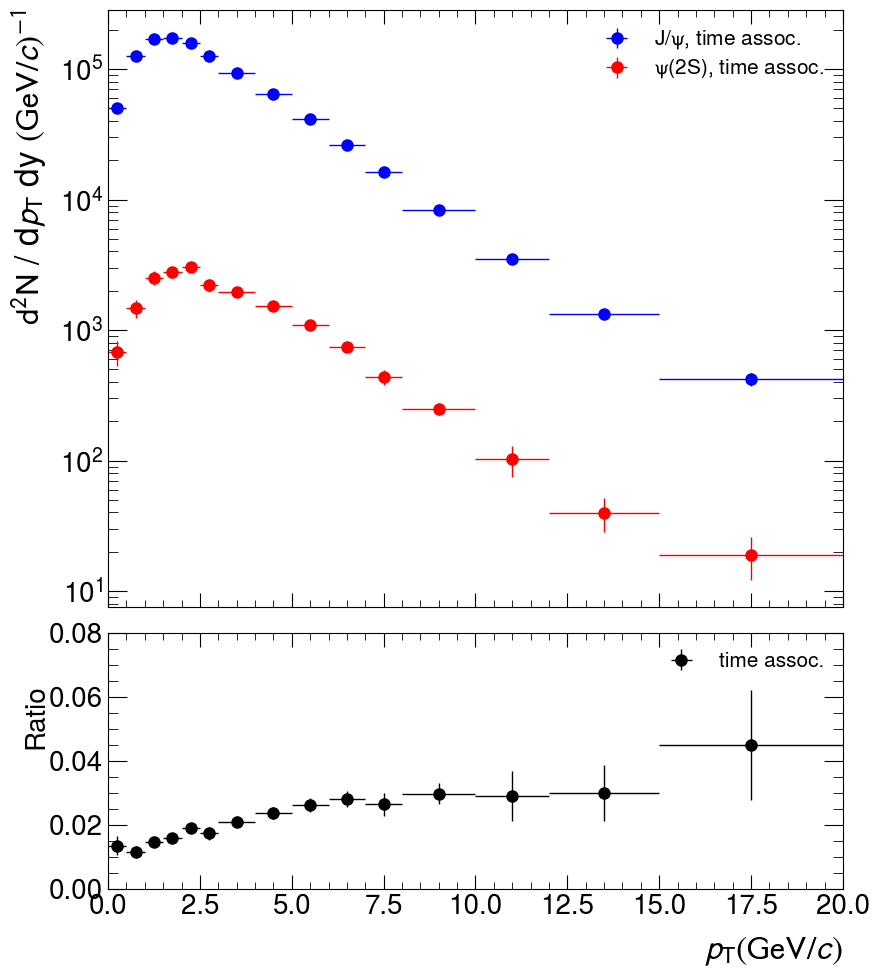

In [132]:
# Raw yield - 2023 Skimmed data - Time association
dfJpsiRawYieldSkimmedTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_run3_analyses/charmonia_cross_section_pp/data/2023/systematic_sig_Jpsi.txt', sep=' ')
ptMinSkimmedTimeAssoc = dfJpsiRawYieldSkimmedTimeAssocVsPt["x_min"]
ptMaxSkimmedTimeAssoc = dfJpsiRawYieldSkimmedTimeAssocVsPt["x_max"]
ptSkimmedTimeAssoc = (ptMinSkimmedTimeAssoc + ptMaxSkimmedTimeAssoc) / 2.
errPtSkimmedTimeAssoc = (ptMaxSkimmedTimeAssoc - ptMinSkimmedTimeAssoc) / 2.
jpsiRawYieldSkimmedTimeAssocVsPt = dfJpsiRawYieldSkimmedTimeAssocVsPt["val"] / (2 * errPtSkimmedTimeAssoc * deltaY)
jpsiStatRawYieldSkimmedTimeAssocVsPt = dfJpsiRawYieldSkimmedTimeAssocVsPt["stat"] / (2 * errPtSkimmedTimeAssoc * deltaY)
jpsiSystRawYieldSkimmedTimeAssocVsPt = dfJpsiRawYieldSkimmedTimeAssocVsPt["syst"] / (2 * errPtSkimmedTimeAssoc * deltaY)

dfPsi2sRawYieldSkimmedTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_run3_analyses/charmonia_cross_section_pp/data/2023/systematic_sig_Psi2s.txt', sep=' ')
psi2sRawYieldSkimmedTimeAssocVsPt = dfPsi2sRawYieldSkimmedTimeAssocVsPt["val"] / (2 * errPtSkimmedTimeAssoc * deltaY)
psi2sStatRawYieldSkimmedTimeAssocVsPt = dfPsi2sRawYieldSkimmedTimeAssocVsPt["stat"] / (2 * errPtSkimmedTimeAssoc * deltaY)
psi2sSystRawYieldSkimmedTimeAssocVsPt = dfPsi2sRawYieldSkimmedTimeAssocVsPt["syst"] / (2 * errPtSkimmedTimeAssoc * deltaY)

dfRatioRawYieldSkimmedTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_run3_analyses/charmonia_cross_section_pp/data/2023/systematic_sig_Ratio.txt', sep=' ')
ratioRawYieldSkimmedTimeAssocVsPt = dfRatioRawYieldSkimmedTimeAssocVsPt["val"]
ratioStatRawYieldSkimmedTimeAssocVsPt = dfRatioRawYieldSkimmedTimeAssocVsPt["stat"]
ratioSystRawYieldSkimmedTimeAssocVsPt = dfRatioRawYieldSkimmedTimeAssocVsPt["syst"]

#################################
# Plot data
#################################
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 10), gridspec_kw={'height_ratios': [7, 3]})

ax1.set_ylabel(r'$d^{2}N$ / d$\it{p}_{\rm{T}}$ dy $(\rm{GeV}/\it{c})^{-1}$', fontsize=24, labelpad=10)
ax1.yaxis.set_label_coords(-0.08, 1.)
ax1.set_yscale('log')
ax1.set_xlim(0, 20)
ax1.tick_params(axis='x', labelbottom=False, labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.errorbar(ptSkimmedTimeAssoc, jpsiRawYieldSkimmedTimeAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=jpsiStatRawYieldSkimmedTimeAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='blue', markersize=8, label=r'J/$\psi$, time assoc.')
ax1.errorbar(ptSkimmedTimeAssoc, psi2sRawYieldSkimmedTimeAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=psi2sStatRawYieldSkimmedTimeAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='red', markersize=8, label=r'$\psi$(2S), time assoc.')
ax1.legend(fontsize=15)

ax2.set_xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$', fontsize=24, labelpad=10)
ax2.set_ylabel(r'Ratio', fontsize=20, labelpad=10)
ax2.yaxis.set_label_coords(-0.08, 0.8)
ax2.set_xlim(0, 20)
ax2.set_ylim(0, 0.08)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.grid(False)
ax2.axhline(y=1., color='black', linestyle='--')
ax2.errorbar(ptSkimmedTimeAssoc, ratioRawYieldSkimmedTimeAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=ratioStatRawYieldSkimmedTimeAssocVsPt, fmt='o', color='black', ecolor='black', markerfacecolor='black', markersize=8, label=r'time assoc.')
ax2.legend(fontsize=15)

plt.tight_layout()
plt.show()

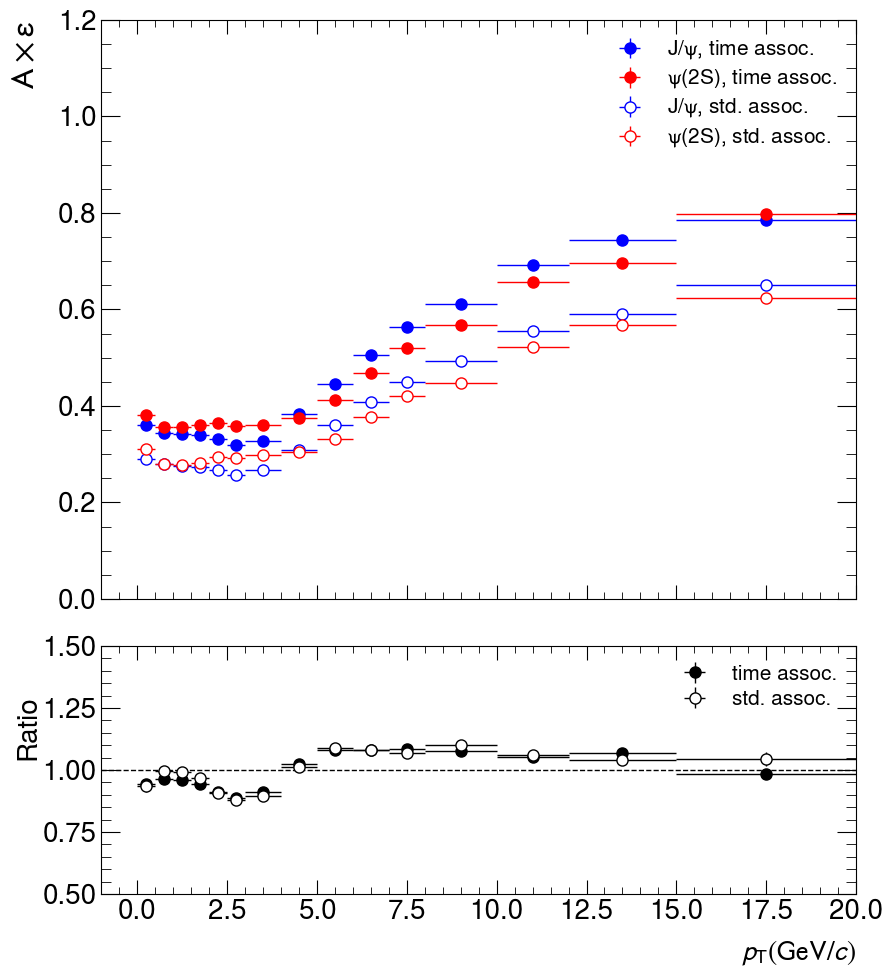

In [134]:
# Axe - 2023 - Time association
dfJpsiAxeTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_run3_analyses/charmonia_cross_section_pp/data/2023/AxE_Jpsi_time_assoc.txt', sep=' ')
ptMinSkimmedTimeAssoc = dfJpsiAxeTimeAssocVsPt["x_min"]
ptMaxSkimmedTimeAssoc = dfJpsiAxeTimeAssocVsPt["x_max"]
jpsiAxeTimeAssocVsPt = dfJpsiAxeTimeAssocVsPt["val"]
jpsiStatAxeTimeAssocVsPt = dfJpsiAxeTimeAssocVsPt["stat"]
jpsiSystAxeTimeAssocVsPt = dfJpsiAxeTimeAssocVsPt["syst"]

dfPsi2sAxeTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_run3_analyses/charmonia_cross_section_pp/data/2023/AxE_Psi2s_time_assoc.txt', sep=' ')
ptMinSkimmedTimeAssoc = dfPsi2sAxeTimeAssocVsPt["x_min"]
ptMaxSkimmedTimeAssoc = dfPsi2sAxeTimeAssocVsPt["x_max"]
psi2sAxeTimeAssocVsPt = dfPsi2sAxeTimeAssocVsPt["val"]
psi2sStatAxeTimeAssocVsPt = dfPsi2sAxeTimeAssocVsPt["stat"]
psi2sSystAxeTimeAssocVsPt = dfPsi2sAxeTimeAssocVsPt["syst"]

dfRatioAxeTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_run3_analyses/charmonia_cross_section_pp/data/2023/AxE_Ratio_time_assoc.txt', sep=' ')
ptMinSkimmedTimeAssoc = dfRatioAxeTimeAssocVsPt["x_min"]
ptMaxSkimmedTimeAssoc = dfRatioAxeTimeAssocVsPt["x_max"]
ratioAxeTimeAssocVsPt = dfRatioAxeTimeAssocVsPt["val"]
ratioStatAxeTimeAssocVsPt = dfRatioAxeTimeAssocVsPt["stat"]
ratioSystAxeTimeAssocVsPt = dfRatioAxeTimeAssocVsPt["syst"]

# Axe - 2023 - Std. association
dfJpsiAxeStdAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_run3_analyses/charmonia_cross_section_pp/data/2023/AxE_Jpsi_std_assoc.txt', sep=' ')
ptMinSkimmedStdAssoc = dfJpsiAxeStdAssocVsPt["x_min"]
ptMaxSkimmedStdAssoc = dfJpsiAxeStdAssocVsPt["x_max"]
jpsiAxeStdAssocVsPt = dfJpsiAxeStdAssocVsPt["val"]
jpsiStatAxeStdAssocVsPt = dfJpsiAxeStdAssocVsPt["stat"]
jpsiSystAxeStdAssocVsPt = dfJpsiAxeStdAssocVsPt["syst"]

dfPsi2sAxeStdAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_run3_analyses/charmonia_cross_section_pp/data/2023/AxE_Psi2s_std_assoc.txt', sep=' ')
ptMinSkimmedStdAssoc = dfPsi2sAxeStdAssocVsPt["x_min"]
ptMaxSkimmedStdAssoc = dfPsi2sAxeStdAssocVsPt["x_max"]
psi2sAxeStdAssocVsPt = dfPsi2sAxeStdAssocVsPt["val"]
psi2sStatAxeStdAssocVsPt = dfPsi2sAxeStdAssocVsPt["stat"]
psi2sSystAxeStdAssocVsPt = dfPsi2sAxeStdAssocVsPt["syst"]

dfRatioAxeStdAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_run3_analyses/charmonia_cross_section_pp/data/2023/AxE_Ratio_std_assoc.txt', sep=' ')
ptMinSkimmedStdAssoc = dfRatioAxeStdAssocVsPt["x_min"]
ptMaxSkimmedStdAssoc = dfRatioAxeStdAssocVsPt["x_max"]
ratioAxeStdAssocVsPt = dfRatioAxeStdAssocVsPt["val"]
ratioStatAxeStdAssocVsPt = dfRatioAxeStdAssocVsPt["stat"]
ratioSystAxeStdAssocVsPt = dfRatioAxeStdAssocVsPt["syst"]


#################################
# Plot data
#################################
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 10), gridspec_kw={'height_ratios': [7, 3]})

ax1.set_ylabel(r'$A\times\varepsilon$', fontsize=24, labelpad=10)
ax1.yaxis.set_label_coords(-0.08, 1.)
ax1.set_xlim(-1, 20)
ax1.set_ylim(0, 1.2)
ax1.tick_params(axis='x', labelbottom=False, labelsize=20)
ax1.tick_params(axis='y', labelbottom=False, labelsize=20)
ax1.errorbar(ptSkimmedTimeAssoc, jpsiAxeTimeAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=jpsiStatAxeTimeAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='blue', markersize=8, label=r'J/$\psi$, time assoc.')
ax1.errorbar(ptSkimmedTimeAssoc, psi2sAxeTimeAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=psi2sStatAxeTimeAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='red', markersize=8, label=r'$\psi$(2S), time assoc.')
ax1.errorbar(ptSkimmedTimeAssoc, jpsiAxeStdAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=jpsiStatAxeTimeAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='white', markersize=8, label=r'J/$\psi$, std. assoc.')
ax1.errorbar(ptSkimmedTimeAssoc, psi2sAxeStdAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=psi2sStatAxeTimeAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='white', markersize=8, label=r'$\psi$(2S), std. assoc.')
ax1.legend(fontsize=15)

ax2.set_xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$', fontsize=20, labelpad=10)
ax2.set_ylabel(r'Ratio', fontsize=20, labelpad=10)
ax2.yaxis.set_label_coords(-0.08, 0.8)
ax2.set_xlim(-1, 20)
ax2.set_ylim(0.5, 1.5)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.grid(False)
ax2.axhline(y=1., color='black', linestyle='--')
ax2.errorbar(ptSkimmedTimeAssoc, ratioAxeTimeAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=ratioStatAxeTimeAssocVsPt, fmt='o', color='black', ecolor='black', markerfacecolor='black', markersize=8, label=r'time assoc.')
ax2.errorbar(ptSkimmedTimeAssoc, ratioAxeStdAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=ratioStatAxeStdAssocVsPt, fmt='o', color='black', ecolor='black', markerfacecolor='white', markersize=8, label=r'std. assoc.')
ax2.legend(fontsize=15)

plt.tight_layout()
plt.show()

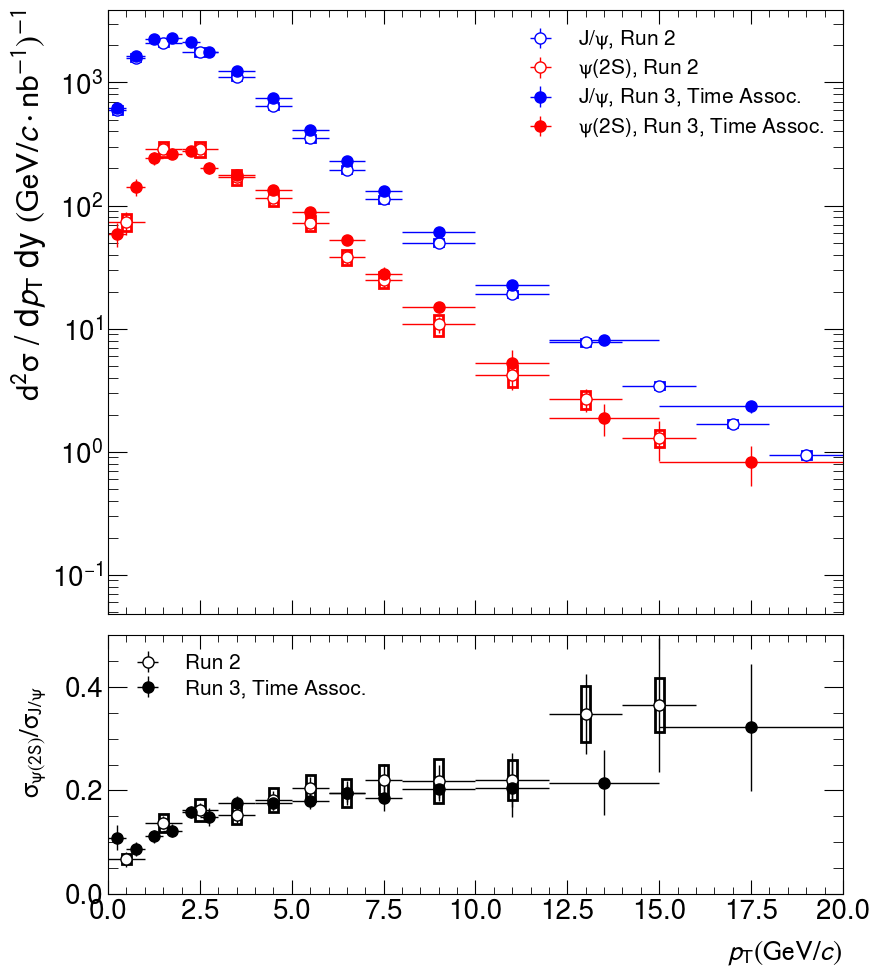

In [147]:
# Cross section - 2023 - Time association
lumiSkimmedTimeAssoc = 4.65172 # pb-1
#jpsiCrossSectionSkimmedTimeAssocVsPt = (jpsiRawYieldSkimmedTimeAssocVsPt) / (jpsiAxeTimeAssocVsPt * BrJpsiToMuMu * lumiSkimmedTimeAssoc * 1000)
#jpsiStatCrossSectionSkimmedTimeAssocVsPt = (jpsiStatRawYieldSkimmedTimeAssocVsPt) / (jpsiAxeTimeAssocVsPt * BrJpsiToMuMu * lumiSkimmedTimeAssoc * 1000)
#jpsiSystCrossSectionSkimmedTimeAssocVsPt = (jpsiSystRawYieldSkimmedTimeAssocVsPt) / (jpsiAxeTimeAssocVsPt * BrJpsiToMuMu * lumiSkimmedTimeAssoc * 1000)
jpsiCrossSectionSkimmedTimeAssocVsPt = (jpsiRawYieldSkimmedTimeAssocVsPt) / (jpsiAxeStdAssocVsPt * BrJpsiToMuMu * lumiSkimmedTimeAssoc * 1000)
jpsiStatCrossSectionSkimmedTimeAssocVsPt = (jpsiStatRawYieldSkimmedTimeAssocVsPt) / (jpsiAxeStdAssocVsPt * BrJpsiToMuMu * lumiSkimmedTimeAssoc * 1000)
jpsiSystCrossSectionSkimmedTimeAssocVsPt = (jpsiSystRawYieldSkimmedTimeAssocVsPt) / (jpsiAxeStdAssocVsPt * BrJpsiToMuMu * lumiSkimmedTimeAssoc * 1000)

#psi2sCrossSectionSkimmedTimeAssocVsPt = (psi2sRawYieldSkimmedTimeAssocVsPt) / (psi2sAxeTimeAssocVsPt * BrPsi2sToMuMu * lumiSkimmedTimeAssoc * 1000)
#psi2sStatCrossSectionSkimmedTimeAssocVsPt = (psi2sStatRawYieldSkimmedTimeAssocVsPt) / (psi2sAxeTimeAssocVsPt * BrPsi2sToMuMu * lumiSkimmedTimeAssoc * 1000)
#psi2sSystCrossSectionSkimmedTimeAssocVsPt = (psi2sSystRawYieldSkimmedTimeAssocVsPt) / (psi2sAxeTimeAssocVsPt * BrPsi2sToMuMu * lumiSkimmedTimeAssoc * 1000)
psi2sCrossSectionSkimmedTimeAssocVsPt = (psi2sRawYieldSkimmedTimeAssocVsPt) / (psi2sAxeStdAssocVsPt * BrPsi2sToMuMu * lumiSkimmedTimeAssoc * 1000)
psi2sStatCrossSectionSkimmedTimeAssocVsPt = (psi2sStatRawYieldSkimmedTimeAssocVsPt) / (psi2sAxeStdAssocVsPt * BrPsi2sToMuMu * lumiSkimmedTimeAssoc * 1000)
psi2sSystCrossSectionSkimmedTimeAssocVsPt = (psi2sSystRawYieldSkimmedTimeAssocVsPt) / (psi2sAxeStdAssocVsPt * BrPsi2sToMuMu * lumiSkimmedTimeAssoc * 1000)

ratioCrossSectionSkimmedTimeAssocVsPt = ratioRawYieldSkimmedTimeAssocVsPt * (1. / ratioAxeStdAssocVsPt) * (BrJpsiToMuMu / BrPsi2sToMuMu)
ratioStatCrossSectionSkimmedTimeAssocVsPt = (ratioStatRawYieldSkimmedTimeAssocVsPt) * (1. / ratioAxeStdAssocVsPt) * (BrJpsiToMuMu / BrPsi2sToMuMu)
ratioSystCrossSectionSkimmedTimeAssocVsPt = (ratioSystRawYieldSkimmedTimeAssocVsPt) * (1. / ratioAxeStdAssocVsPt) * (BrJpsiToMuMu / BrPsi2sToMuMu)

# Run 2 results
filePathJpsi = "/Users/lucamicheletti/GITHUB/dq_run3_analyses/psi2S_jpsi_ratio/results/HEPData-77781-v1-yaml/Table1.yaml"
jpsiPtCenters, jpsiPtWidths, jpsiCrossSectionRun2VsPt, jpsiStatCrossSectionRun2VsPt, jpsiSystCrossSectionRun2VsPt = ExtractFromYaml(filePathJpsi)

filePathPsi2s = "/Users/lucamicheletti/GITHUB/dq_run3_analyses/psi2S_jpsi_ratio/results/HEPData-77781-v1-yaml/Table3.yaml"
psi2sPtCenters, psi2sPtWidths, psi2sCrossSectionRun2VsPt, psi2sStatCrossSectionRun2VsPt, psi2sSystCrossSectionRun2VsPt = ExtractFromYaml(filePathPsi2s)

filePathRatio = "/Users/lucamicheletti/GITHUB/dq_run3_analyses/psi2S_jpsi_ratio/results/HEPData-77781-v1-yaml/Table5.yaml"
ratioPtCenters, ratioPtWidths, ratioCrossSectionRun2VsPt, ratioStatCrossSectionRun2VsPt, ratioSystCrossSectionRun2VsPt = ExtractFromYaml(filePathRatio)


#################################
# Plot data
#################################

f_y1 = interp1d(ptSkimmedTimeAssoc, jpsiCrossSectionSkimmedTimeAssocVsPt, kind='slinear', bounds_error=False, fill_value="extrapolate")
f_err1 = interp1d(ptSkimmedTimeAssoc, jpsiStatCrossSectionSkimmedTimeAssocVsPt, kind='slinear', bounds_error=False, fill_value="extrapolate")

y1_interp = f_y1(jpsiPtCenters)
err1_interp = f_err1(jpsiPtCenters)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 10), gridspec_kw={'height_ratios': [7, 3]})

ax1.set_ylabel(r'$d^{2}\sigma$ / d$\it{p}_{\rm{T}}$ dy $(\rm{GeV}/\it{c} \cdot \rm{nb^{-1}})^{-1}$', fontsize=24, labelpad=10)
ax1.yaxis.set_label_coords(-0.08, 1.)
ax1.set_yscale('log')
ax1.set_xlim(0, 20)
ax1.tick_params(axis='x', labelbottom=False, labelsize=20)
ax1.tick_params(axis='y', labelbottom=False, labelsize=20)
plot_syst(jpsiPtCenters, 0.125, jpsiCrossSectionRun2VsPt, jpsiSystCrossSectionRun2VsPt, ax1, 'blue', 2)
ax1.errorbar(jpsiPtCenters, jpsiCrossSectionRun2VsPt, xerr=jpsiPtWidths, yerr=jpsiStatCrossSectionRun2VsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='white', markersize=8, label=r'J/$\psi$, Run 2')
plot_syst(psi2sPtCenters, 0.125, psi2sCrossSectionRun2VsPt, psi2sSystCrossSectionRun2VsPt, ax1, 'red', 2)
ax1.errorbar(psi2sPtCenters, psi2sCrossSectionRun2VsPt, xerr=psi2sPtWidths, yerr=psi2sStatCrossSectionRun2VsPt, fmt='o', color='red', ecolor='red', markerfacecolor='white', markersize=8, label=r'$\psi$(2S), Run 2')
ax1.errorbar(ptSkimmedTimeAssoc, jpsiCrossSectionSkimmedTimeAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=jpsiStatCrossSectionSkimmedTimeAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='blue', markersize=8, label=r'J/$\psi$, Run 3, Time Assoc.')
ax1.errorbar(ptSkimmedTimeAssoc, psi2sCrossSectionSkimmedTimeAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=psi2sStatCrossSectionSkimmedTimeAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='red', markersize=8, label=r'$\psi$(2S), Run 3, Time Assoc.')
#ax1.errorbar(jpsiPtCenters, y1_interp, yerr=err1_interp, fmt='-o', label='Curva A interpolata su B')
ax1.legend(fontsize=15)

ax2.set_xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$', fontsize=20, labelpad=10)
ax2.set_ylabel(r'$\sigma_{\psi(\rm{2S})} / \sigma_{\rm{J}/\psi}$', fontsize=20, labelpad=10)
ax2.yaxis.set_label_coords(-0.08, 0.8)
ax2.set_xlim(0, 20)
ax2.set_ylim(0, 0.5)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.grid(False)
plot_syst(ratioPtCenters, 0.125, ratioCrossSectionRun2VsPt, ratioSystCrossSectionRun2VsPt, ax2, 'black', 2)
ax2.errorbar(ratioPtCenters, ratioCrossSectionRun2VsPt, xerr=ratioPtWidths, yerr=ratioStatCrossSectionRun2VsPt, fmt='o', color='black', ecolor='black', markerfacecolor='white', markersize=8, label=r'Run 2')
ax2.errorbar(ptSkimmedTimeAssoc, ratioCrossSectionSkimmedTimeAssocVsPt, xerr=errPtSkimmedTimeAssoc, yerr=ratioStatCrossSectionSkimmedTimeAssocVsPt, fmt='o', color='black', ecolor='black', markerfacecolor='black', markersize=8, label=r'Run 3, Time Assoc.')
ax2.legend(fontsize=15)

plt.tight_layout()
plt.show()

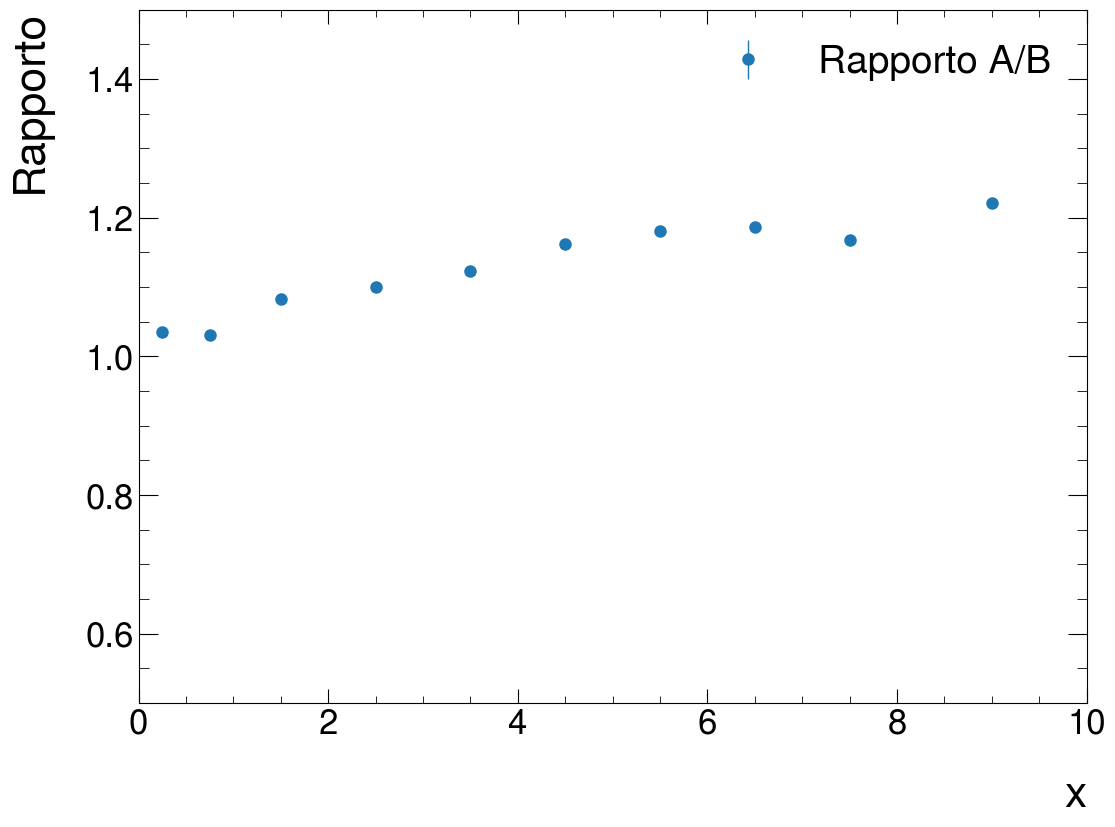

In [146]:
f_y1 = interp1d(ptSkimmedTimeAssoc, jpsiCrossSectionSkimmedTimeAssocVsPt, kind='linear', bounds_error=False, fill_value="extrapolate")
f_err1 = interp1d(ptSkimmedTimeAssoc, jpsiStatCrossSectionSkimmedTimeAssocVsPt, kind='linear', bounds_error=False, fill_value="extrapolate")

y1_interp = f_y1(jpsiPtCenters)
err1_interp = f_err1(jpsiPtCenters)

# Calcolo del rapporto e dell'errore sul rapporto
ratio = y1_interp / jpsiCrossSectionRun2VsPt

# Propagazione dell'errore: (σ_R / R)^2 = (σ1 / y1)^2 + (σ2 / y2)^2
ratio_err = 0 #ratio * np.sqrt((err1_interp / y1_interp)**2 + (jpsiStatCrossSectionRun2VsPt / jpsiCrossSectionRun2VsPt)**2)

# Plot
fig, ax = plt.subplots()
ax.errorbar(jpsiPtCenters, ratio, yerr=ratio_err, fmt='o', label='Rapporto A/B')
ax.set_xlabel('x')
ax.set_ylabel('Rapporto')
ax.set_xlim(0, 10)
ax.set_ylim(0.5, 1.5)
ax.legend()
plt.show()
